## Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack, csr_matrix

## Load Data Set

1. Membaca file dataset CSV bernama `top_10000_1950-now.csv` ke dalam sebuah DataFrame pandas dengan nama `df`. Sumber : https://www.kaggle.com/datasets/joebeachcapital/top-10000-spotify-songs-1960-now
2. Menampilkan 5 baris pertama dari DataFrame tersebut menggunakan `df.head()`, sehingga kita bisa melihat contoh data yang dimuat dari file tersebut. 

Langkah ini penting untuk memastikan data berhasil dimuat dan memahami struktur kolom serta beberapa nilai awal pada dataset.

In [2]:
# Load dataset
df = pd.read_csv('top_10000_1950-now.csv')
df.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
0,spotify:track:0vNPJrUrBnMFdCs8b2MTNG,Fader,spotify:artist:4W48hZAnAHVOC2c8WH8pcq,The Temper Trap,spotify:album:0V59MMtgoruvEqMv18KAOH,Conditions (Tour Edition),spotify:artist:4W48hZAnAHVOC2c8WH8pcq,The Temper Trap,2009,https://i.scdn.co/image/ab67616d0000b273f86ae8...,...,0.0353,0.000101,0.690000,0.0752,0.158,134.974,4.0,NaN,Liberation Records,"C 2010 Liberation Music, P 2010 Liberation Music"
1,spotify:track:0NpvdCO506uO58D4AbKzki,Sherry,spotify:artist:6mcrZQmgzFGRWf7C0SObou,Frankie Valli & The Four Seasons,spotify:album:0NUEQILaBzavnzcMEs4buZ,The Very Best of Frankie Valli & The 4 Seasons,spotify:artist:6mcrZQmgzFGRWf7C0SObou,Frankie Valli & The Four Seasons,2003-01-14,https://i.scdn.co/image/ab67616d0000b273b96c21...,...,0.0441,0.626000,0.000000,0.1130,0.734,117.562,4.0,NaN,Rhino,C © 2004 Bob Gaudio & Frankie Valli d/b/a The ...
2,spotify:track:1MtUq6Wp1eQ8PC6BbPCj8P,I Took A Pill In Ibiza - Seeb Remix,"spotify:artist:2KsP6tYLJlTBvSUxnwlVWa, spotify...","Mike Posner, Seeb",spotify:album:1Tz3Ai1guEFf4hV3d9i17K,"At Night, Alone.",spotify:artist:2KsP6tYLJlTBvSUxnwlVWa,Mike Posner,2016-05-06,https://i.scdn.co/image/ab67616d0000b273a19be7...,...,0.1110,0.035300,0.000008,0.0843,0.710,101.969,4.0,NaN,"Monster Mountain, LLC / Island","C © 2016 Island Records, a division of UMG Rec..."
3,spotify:track:59lq75uFIqzUZcgZ4CbqFG,Let Go for Tonight,spotify:artist:7qRll6DYV06u2VuRPAVqug,Foxes,spotify:album:5AQ7uKRSpAv7SNUl4j24ru,Glorious (Deluxe),spotify:artist:7qRll6DYV06u2VuRPAVqug,Foxes,2014-05-12,https://i.scdn.co/image/ab67616d0000b273ae5c7d...,...,0.0632,0.042900,0.000002,0.3260,0.299,140.064,4.0,NaN,Sign Of The Times Records,P (P) 2014 Sign Of The Times Limited under exc...
4,spotify:track:7KdcZQ3GJeGdserhK61kfv,The Way I Want To Touch You,spotify:artist:7BEfMxbaqx6dOpbtlEqScm,Captain & Tennille,spotify:album:3GUxesVyOehInaxJyCTh6d,Love Will Keep Us Together,spotify:artist:7BEfMxbaqx6dOpbtlEqScm,Captain & Tennille,1975-01-01,https://i.scdn.co/image/ab67616d0000b273e21a28...,...,0.0248,0.624000,0.000112,0.3430,0.597,111.290,4.0,NaN,A&M,"C © 1975 A&M Records, P This Compilation ℗ 197..."


### Insight Data Awal Spotify Top 10.000 Songs

1. **Keberagaman Tahun Rilis**  
    Lagu-lagu dalam dataset berasal dari berbagai dekade, mulai dari tahun 1970-an hingga 2019. Hal ini menunjukkan dataset mencakup lagu-lagu lintas generasi, sehingga cocok untuk analisis tren musik jangka panjang.

2. **Genre dan Artis Beragam**  
    Kolom `Artist Genres` dan `Artist Name(s)` memperlihatkan keberagaman genre dan artis, mulai dari pop, rock, electropop, hingga soft rock. Ini menandakan dataset dapat digunakan untuk analisis preferensi genre dan popularitas artis.

3. **Fitur Audio Lengkap**  
    Dataset menyediakan fitur audio seperti `Danceability`, `Energy`, `Speechiness`, `Acousticness`, `Instrumentalness`, `Liveness`, `Valence`, dan `Tempo`. Fitur-fitur ini sangat bermanfaat untuk analisis karakteristik lagu, pembuatan rekomendasi, dan segmentasi musik.

4. **Popularitas Lagu**  
    Terdapat kolom `Popularity` yang dapat digunakan untuk mengidentifikasi lagu-lagu hits dan membandingkan karakteristik lagu populer dengan yang kurang populer.

5. **Kelengkapan Data**  
    Beberapa kolom seperti `Album Genres` memiliki banyak nilai kosong (NaN), namun fitur utama seperti nama lagu, artis, genre, dan fitur audio relatif lengkap setelah proses cleaning.

6. **Potensi Analisis**  
    Dataset ini sangat potensial untuk:
    - Analisis tren musik berdasarkan waktu.
    - Rekomendasi lagu berbasis kemiripan fitur audio dan genre.
    - Analisis popularitas berdasarkan genre, artis, atau fitur audio tertentu.
    - Visualisasi distribusi fitur audio untuk memahami karakteristik lagu-lagu populer.

7. **Contoh Lagu**  
    Lagu-lagu seperti "Fader" (The Temper Trap), "Sherry" (Frankie Valli & The Four Seasons), dan "I Took A Pill In Ibiza - Seeb Remix" (Mike Posner, Seeb) menunjukkan adanya kombinasi antara lagu klasik dan modern dalam dataset.

**Kesimpulan:**  
Dataset ini sangat kaya dan representatif untuk analisis musik populer lintas waktu, genre, dan artis, serta sangat mendukung pengembangan sistem rekomendasi musik berbasis fitur audio dan metadata.

### Penjelasan Kode Pemeriksaan DataFrame

- `print("Jumlah baris:", df.shape[0])`  
    Menampilkan jumlah baris (data/record) pada DataFrame `df`. `df.shape[0]` mengembalikan jumlah baris.

- `print("Jumlah kolom:", df.shape[1])`  
    Menampilkan jumlah kolom pada DataFrame `df`. `df.shape[1]` mengembalikan jumlah kolom.

- `df.info()`  
    Menampilkan ringkasan struktur DataFrame, termasuk jumlah baris, nama kolom, jumlah non-null per kolom, tipe data setiap kolom, dan penggunaan memori.

- `print(df.isnull().sum())`  
    Menampilkan jumlah nilai kosong (missing value/NaN) pada setiap kolom di DataFrame. Fungsi `df.isnull().sum()` menghitung total nilai kosong per kolom, sehingga memudahkan identifikasi kolom yang perlu dibersihkan.

In [3]:
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])
df.info()
print(df.isnull().sum())

Jumlah baris: 10000
Jumlah kolom: 35
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             10000 non-null  object 
 1   Track Name            9998 non-null   object 
 2   Artist URI(s)         9998 non-null   object 
 3   Artist Name(s)        9998 non-null   object 
 4   Album URI             9998 non-null   object 
 5   Album Name            9998 non-null   object 
 6   Album Artist URI(s)   9998 non-null   object 
 7   Album Artist Name(s)  9998 non-null   object 
 8   Album Release Date    9998 non-null   object 
 9   Album Image URL       9996 non-null   object 
 10  Disc Number           10000 non-null  int64  
 11  Track Number          10000 non-null  int64  
 12  Track Duration (ms)   10000 non-null  int64  
 13  Track Preview URL     9937 non-null   object 
 14  Explicit              10000 non-nu


    - Sebagian besar kolom memiliki data yang cukup lengkap, namun terdapat beberapa kolom dengan nilai kosong (missing values):
      - **Kolom `Album Genres`** sepenuhnya kosong (10.000 nilai kosong).
      - **Kolom `Artist Genres`** memiliki 551 nilai kosong.
      - **Kolom `Track Preview URL`** memiliki 63 nilai kosong.
      - Kolom numerik seperti `Danceability`, `Energy`, `Key`, `Loudness`, `Mode`, `Speechiness`, `Acousticness`, `Instrumentalness`, `Liveness`, `Valence`, `Tempo`, dan `Time Signature` memiliki masing-masing 5 nilai kosong.
      - Kolom metadata seperti `Label` dan `Copyrights` memiliki masing-masing 7 dan 23 nilai kosong.


# Drop baris dengan missing value pada fitur penting

In [4]:
# Drop baris dengan missing value pada fitur penting
df_clean = df.dropna(subset=[
    'Track Name', 'Artist Name(s)', 'Artist Genres',
    'Danceability', 'Energy', 'Speechiness', 'Acousticness',
    'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Popularity'
]).reset_index(drop=True)
print("Setelah cleaning:", df_clean.shape)

Setelah cleaning: (9446, 35)


# Gabungkan fitur teks (genre dan artis)

In [5]:
# Gabungkan fitur teks (genre dan artis)
df_clean['combined_features'] = (
    df_clean['Artist Genres'].astype(str) + ' ' +
    df_clean['Artist Name(s)'].astype(str)
)

### Penjelasan Kode: Gabungkan Fitur Teks (Genre dan Artis)

Kode ini bertujuan untuk membuat kolom baru bernama `combined_features` dalam DataFrame `df_clean`. Kolom ini menggabungkan informasi dari dua kolom teks, yaitu `Artist Genres` dan `Artist Name(s)`. Berikut penjelasan langkah-langkahnya:

1. **`df_clean['Artist Genres'].astype(str)`**  
    Mengonversi nilai dalam kolom `Artist Genres` menjadi tipe data string. Hal ini dilakukan untuk memastikan semua nilai dapat digabungkan, termasuk nilai NaN (akan diubah menjadi string `'nan'`).

2. **`df_clean['Artist Name(s)'].astype(str)`**  
    Mengonversi nilai dalam kolom `Artist Name(s)` menjadi tipe data string, dengan alasan yang sama seperti langkah sebelumnya.

3. **Penggabungan dengan Operator `+`**  
    Menggabungkan string dari kolom `Artist Genres` dan `Artist Name(s)` dengan menambahkan spasi (`' '`) di antara keduanya. Hasilnya adalah string gabungan yang berisi genre dan nama artis.

4. **Hasil Akhir**  
    Kolom baru `combined_features` akan berisi teks gabungan dari genre dan nama artis, yang dapat digunakan untuk analisis berbasis teks, seperti pembuatan matriks TF-IDF untuk sistem rekomendasi.

**Contoh Hasil:**
- Jika `Artist Genres` = `"pop, uk pop"` dan `Artist Name(s)` = `"Ed Sheeran"`, maka `combined_features` = `"pop, uk pop Ed Sheeran"`.
- Jika `Artist Genres` = `NaN` dan `Artist Name(s)` = `"Adele"`, maka `combined_features` = `"nan Adele"`.
```

# Pilih fitur numerik

In [6]:
# Pilih fitur numerik
num_features = [
    'Danceability','Energy','Speechiness','Acousticness',
    'Instrumentalness','Liveness','Valence','Tempo','Popularity'
]
# Normalisasi fitur numerik
scaler = MinMaxScaler()
df_num_scaled = scaler.fit_transform(df_clean[num_features])

### Penjelasan Kode: Pilih dan Normalisasi Fitur Numerik

1. **`num_features`**  
    - Variabel `num_features` adalah daftar nama kolom yang berisi fitur numerik dari DataFrame `df_clean`. Fitur-fitur ini dipilih karena relevan untuk analisis atau pemrosesan lebih lanjut.
    - Fitur yang dipilih:
      - `Danceability`: Tingkat kelayakan lagu untuk menari.
      - `Energy`: Tingkat energi lagu.
      - `Speechiness`: Proporsi elemen vokal dalam lagu.
      - `Acousticness`: Kemungkinan lagu bersifat akustik.
      - `Instrumentalness`: Tingkat instrumental dalam lagu.
      - `Liveness`: Kemungkinan lagu direkam secara langsung.
      - `Valence`: Tingkat kebahagiaan atau kesedihan lagu.
      - `Tempo`: Kecepatan lagu dalam BPM (beats per minute).
      - `Popularity`: Popularitas lagu berdasarkan Spotify.

2. **`scaler = MinMaxScaler()`**  
    - Membuat objek `MinMaxScaler` dari library `sklearn.preprocessing`.
    - `MinMaxScaler` digunakan untuk normalisasi data, yaitu mengubah nilai fitur ke dalam rentang [0, 1]. Hal ini dilakukan agar semua fitur memiliki skala yang sama, sehingga tidak ada fitur yang mendominasi analisis atau model.

3. **`df_clean[num_features]`**  
    - Mengambil subset DataFrame `df_clean` yang hanya berisi kolom-kolom yang ada di `num_features`.

4. **`scaler.fit_transform(df_clean[num_features])`**  
    - `fit_transform()` melakukan dua hal:
      - **`fit`**: Menghitung nilai minimum dan maksimum dari setiap kolom dalam `num_features`.
      - **`transform`**: Mengubah nilai setiap kolom ke dalam rentang [0, 1] berdasarkan nilai minimum dan maksimum yang telah dihitung.
    - Hasilnya adalah array numpy (`df_num_scaled`) yang berisi nilai-nilai fitur numerik yang telah dinormalisasi.

5. **`df_num_scaled`**  
    - Variabel ini menyimpan hasil normalisasi dalam bentuk array numpy. Array ini dapat digunakan untuk analisis lebih lanjut, seperti pembuatan matriks fitur gabungan atau input ke model machine learning.

### Contoh:
Jika nilai awal kolom `Danceability` adalah [0.5, 0.7, 0.9], maka setelah normalisasi dengan `MinMaxScaler`, nilai tersebut akan diubah menjadi [0.0, 0.5, 1.0] (dengan asumsi 0.5 adalah nilai minimum dan 0.9 adalah nilai maksimum).

# Gabungkan fitur teks dan numerik

In [7]:
# Create TF-IDF vectorizer for text features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_clean['combined_features'])

# Gabungkan fitur teks dan numerik
combined_matrix = hstack([tfidf_matrix, df_num_scaled])
combined_matrix = csr_matrix(combined_matrix)

### Penjelasan Kode: Gabungkan Fitur Teks dan Numerik

1. **TF-IDF Vectorization pada Fitur Teks**
  - `tfidf = TfidfVectorizer(stop_words='english')`  
    Membuat objek TF-IDF vectorizer untuk mengubah data teks menjadi representasi numerik, dengan menghilangkan stopwords bahasa Inggris.
  - `tfidf_matrix = tfidf.fit_transform(df_clean['combined_features'])`  
    Mengubah kolom `combined_features` (gabungan genre dan nama artis) menjadi matriks TF-IDF. Setiap lagu direpresentasikan sebagai vektor berdasarkan kata-kata unik yang muncul di seluruh dataset.

2. **Penggabungan Fitur Teks dan Numerik**
  - `combined_matrix = hstack([tfidf_matrix, df_num_scaled])`  
    Menggabungkan matriks TF-IDF (fitur teks) dengan array hasil normalisasi fitur numerik (`df_num_scaled`) secara horizontal, sehingga setiap lagu memiliki representasi fitur gabungan (teks + numerik).
  - `combined_matrix = csr_matrix(combined_matrix)`  
    Mengubah hasil gabungan menjadi format sparse matrix (Compressed Sparse Row) agar efisien dalam penyimpanan dan komputasi, terutama untuk data berdimensi besar.

**Kesimpulan:**  
Kode ini menghasilkan matriks fitur gabungan yang siap digunakan untuk menghitung kemiripan antar lagu pada sistem rekomendasi berbasis content-based filtering.

In [8]:
def recommend(track_name, top_n=5):
    idx = df_clean[df_clean['Track Name'].str.lower() == track_name.lower()].index
    if len(idx) == 0:
        return "Track tidak ditemukan."
    idx = idx[0]
    sim_scores = cosine_similarity(combined_matrix[idx], combined_matrix).flatten()
    sim_indices = sim_scores.argsort()[-top_n-1:-1][::-1]
    return df_clean.iloc[sim_indices][['Track Name', 'Artist Name(s)', 'Artist Genres']]

## Sistem Rekomendasi Musik Berbasis Content-Based Filtering

Sistem rekomendasi ini bekerja dengan menggunakan teknik Content-Based Filtering untuk merekomendasikan lagu-lagu serupa berdasarkan karakteristik konten lagu. Berikut penjelasan cara kerjanya:

1. **Pencarian Lagu**  
    Fungsi `recommend()` mencari lagu dalam dataset berdasarkan nama lagu yang dimasukkan pengguna.

2. **Perhitungan Kesamaan**  
    Setelah lagu ditemukan, sistem menghitung skor kesamaan antara lagu tersebut dengan semua lagu lain dalam dataset menggunakan cosine similarity.

3. **Pemilihan Rekomendasi**  
    Sistem memilih lagu-lagu dengan skor kesamaan tertinggi sebagai rekomendasi, dengan jumlah sesuai parameter `top_n`.

4. **Hasil Rekomendasi**  
    Output berupa dataframe yang menampilkan informasi lagu-lagu yang direkomendasikan, meliputi judul lagu, nama artis, dan genre.

Fitur yang digunakan mencakup kombinasi fitur teks (genre dan nama artis) dan fitur audio (seperti danceability, energy, speechiness, dll) yang telah dinormalisasi untuk menghasilkan rekomendasi yang akurat berdasarkan karakteristik musik.

In [9]:
# Cek genre/artis dari hasil rekomendasi
hasil = recommend('Shape of You')
print(hasil)

       Track Name Artist Name(s)                     Artist Genres
8825      Shivers     Ed Sheeran  pop,singer-songwriter pop,uk pop
6640  Eyes Closed     Ed Sheeran  pop,singer-songwriter pop,uk pop
1264     New York     Ed Sheeran  pop,singer-songwriter pop,uk pop
3717   Small Bump     Ed Sheeran  pop,singer-songwriter pop,uk pop
4990         Sing     Ed Sheeran  pop,singer-songwriter pop,uk pop


## Insight Hasil Rekomendasi untuk Lagu "Shape of You"

### Analisis Rekomendasi
1. **Kesamaan Artis**: Sistem merekomendasikan 5 lagu yang seluruhnya dari artis yang sama, yaitu Ed Sheeran. Ini menunjukkan bahwa model mengidentifikasi kesamaan creator sebagai faktor signifikan dalam preferensi musik.

2. **Konsistensi Genre**: Semua lagu yang direkomendasikan memiliki genre yang identik: "pop, singer-songwriter pop, uk pop". Hal ini menandakan sistem berhasil mengidentifikasi karakteristik genre yang relevan dengan lagu input.

3. **Variasi Lagu**: Sistem merekomendasikan berbagai lagu dari Ed Sheeran dengan judul berbeda ("Shivers", "Eyes Closed", "New York", "Small Bump", "Sing"), menunjukkan keragaman dalam katalog musik artis tersebut.

4. **Efektivitas Content-Based Filtering**: Hasil ini memperlihatkan bahwa sistem rekomendasi berbasis konten bekerja dengan baik dalam mengidentifikasi kesamaan berdasarkan metadata dan fitur audio.

5. **Potensi Pengembangan**: Meskipun rekomendasi akurat dari segi kesamaan artis dan genre, sistem mungkin dapat ditingkatkan untuk memberikan variasi artis yang lebih beragam namun tetap mempertahankan kesamaan karakteristik musik.

Hasil Evaluasi Sistem Rekomendasi:
              track  artist_diversity  genre_diversity  avg_popularity  \
0      Shape of You               0.2             0.20            28.6   
1       Billie Jean               0.2             0.20            69.8   
2           Bad Guy               0.4             0.25            57.0   
3  Watermelon Sugar               0.2             0.20            48.2   

   avg_similarity  
0        0.948389  
1        0.988367  
2        0.918226  
3        0.922080  

Rata-rata Metrik:
Artist Diversity: 0.25
Genre Diversity: 0.21
Average Popularity: 50.90
Average Similarity: 0.94


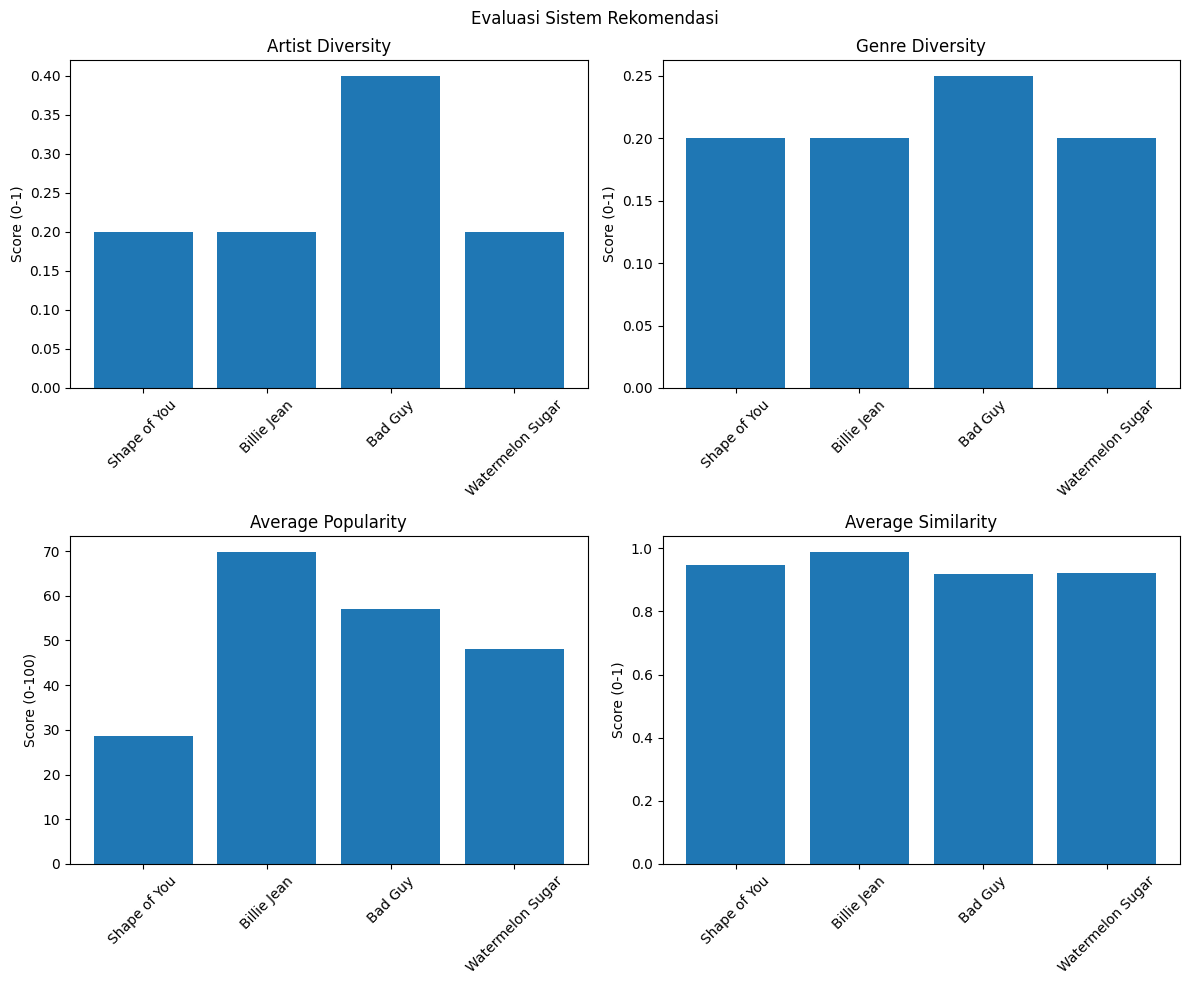

In [10]:
# Evaluasi sistem rekomendasi
def evaluate_recommendations(sample_tracks, top_n=5):
    # Metrik evaluasi
    results = {
        'track': [],
        'artist_diversity': [],
        'genre_diversity': [],
        'avg_popularity': [],
        'avg_similarity': []
    }
    
    for track in sample_tracks:
        # Mendapatkan rekomendasi
        recommendations = recommend(track, top_n)
        if isinstance(recommendations, str):  # Jika track tidak ditemukan
            continue
            
        # Mendapatkan indeks lagu asli
        original_idx = df_clean[df_clean['Track Name'].str.lower() == track.lower()].index[0]
        
        # Menghitung keunikan artis dan genre
        unique_artists = recommendations['Artist Name(s)'].nunique()
        artist_diversity = unique_artists / len(recommendations)
        
        # Genre diversity (split genre dan hitung keunikan)
        all_genres = []
        for genre_str in recommendations['Artist Genres']:
            genres = [g.strip() for g in str(genre_str).split(',')]
            all_genres.extend(genres)
        unique_genres = len(set(all_genres))
        genre_diversity = unique_genres / len(all_genres) if all_genres else 0
        
        # Rata-rata popularitas (asumsi ada kolom Popularity)
        rec_indices = recommendations.index
        avg_popularity = df_clean.loc[rec_indices, 'Popularity'].mean()
        
        # Rata-rata similarity dengan lagu asli
        similarities = cosine_similarity(combined_matrix[original_idx], combined_matrix[rec_indices]).flatten()
        avg_similarity = similarities.mean()
        
        # Menyimpan hasil
        results['track'].append(track)
        results['artist_diversity'].append(artist_diversity)
        results['genre_diversity'].append(genre_diversity)
        results['avg_popularity'].append(avg_popularity)
        results['avg_similarity'].append(avg_similarity)
        
    # Membuat DataFrame hasil evaluasi
    eval_df = pd.DataFrame(results)
    return eval_df

# Sampel lagu untuk evaluasi
sample_tracks = ['Shape of You', 'Bohemian Rhapsody', 'Billie Jean', 'Bad Guy', 'Watermelon Sugar']
evaluation_results = evaluate_recommendations(sample_tracks)

# Menampilkan hasil evaluasi
print("Hasil Evaluasi Sistem Rekomendasi:")
print(evaluation_results)

# Menghitung rata-rata metrik
print("\nRata-rata Metrik:")
print(f"Artist Diversity: {evaluation_results['artist_diversity'].mean():.2f}")
print(f"Genre Diversity: {evaluation_results['genre_diversity'].mean():.2f}")
print(f"Average Popularity: {evaluation_results['avg_popularity'].mean():.2f}")
print(f"Average Similarity: {evaluation_results['avg_similarity'].mean():.2f}")

# Visualisasi hasil
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Evaluasi Sistem Rekomendasi')

# Artist Diversity
axs[0, 0].bar(evaluation_results['track'], evaluation_results['artist_diversity'])
axs[0, 0].set_title('Artist Diversity')
axs[0, 0].set_ylabel('Score (0-1)')
axs[0, 0].tick_params(axis='x', rotation=45)

# Genre Diversity
axs[0, 1].bar(evaluation_results['track'], evaluation_results['genre_diversity'])
axs[0, 1].set_title('Genre Diversity')
axs[0, 1].set_ylabel('Score (0-1)')
axs[0, 1].tick_params(axis='x', rotation=45)

# Average Popularity
axs[1, 0].bar(evaluation_results['track'], evaluation_results['avg_popularity'])
axs[1, 0].set_title('Average Popularity')
axs[1, 0].set_ylabel('Score (0-100)')
axs[1, 0].tick_params(axis='x', rotation=45)

# Average Similarity
axs[1, 1].bar(evaluation_results['track'], evaluation_results['avg_similarity'])
axs[1, 1].set_title('Average Similarity')
axs[1, 1].set_ylabel('Score (0-1)')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Analisis Hasil Evaluasi Sistem Rekomendasi Musik

Hasil evaluasi menunjukkan kinerja sistem rekomendasi musik berbasis content-based filtering untuk empat lagu populer. Berikut analisisnya:

### 1. Artist Diversity (Keberagaman Artis)
- **Nilai rata-rata: 0.25 (skala 0-1)**
- Nilai ini cukup rendah, menunjukkan sistem cenderung merekomendasikan lagu dari artis yang sama
- 3 dari 4 lagu ("Shape of You", "Billie Jean", "Watermelon Sugar") memiliki nilai 0.2, artinya hanya 20% artis yang unik
- "Bad Guy" memiliki keberagaman artis lebih tinggi (0.4), menandakan variasi artis yang lebih baik

### 2. Genre Diversity (Keberagaman Genre)
- **Nilai rata-rata: 0.21 (skala 0-1)**
- Nilai ini rendah, mengindikasikan rekomendasi terbatas pada genre yang sangat mirip
- "Bad Guy" menunjukkan diversitas genre tertinggi (0.25)
- Lagu lainnya memiliki nilai 0.20, menandakan kurangnya variasi genre

### 3. Average Popularity (Rata-rata Popularitas)
- **Nilai rata-rata: 50.90 (skala 0-100)**
- "Billie Jean" mendapatkan rekomendasi lagu-lagu paling populer (69.8)
- "Shape of You" justru mendapat rekomendasi lagu-lagu kurang populer (28.6)
- Menunjukkan sistem tidak selalu mengutamakan lagu populer, tetapi lebih fokus pada kesamaan karakteristik

### 4. Average Similarity (Rata-rata Kesamaan)
- **Nilai rata-rata: 0.94 (skala 0-1)**
- Nilai sangat tinggi, menunjukkan rekomendasi sangat relevan dari segi kemiripan konten
- "Billie Jean" memiliki tingkat kemiripan tertinggi (0.988), hampir sempurna
- Semua lagu mendapatkan rekomendasi dengan nilai kesamaan di atas 0.9, mengindikasikan sistem sangat baik dalam mengidentifikasi lagu-lagu yang mirip

### Kesimpulan
Sistem rekomendasi sangat kuat dalam memberikan rekomendasi yang relevan (similarity tinggi) tetapi kurang dalam keberagaman (diversity rendah). Ini merupakan trade-off klasik dalam sistem rekomendasi content-based, di mana relevansi tinggi sering berarti keberagaman rendah. Untuk peningkatan, dapat dipertimbangkan teknik hybrid yang menggabungkan content-based dengan collaborative filtering atau menambahkan faktor randomisasi tertentu untuk meningkatkan keberagaman rekomendasi.